<a href="https://colab.research.google.com/github/Shantuuu/AI-Fun-Projects/blob/main/Winner_Prediction_CS_GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests

url= "https://www.openml.org/data/download/22102255/dataset"
r= requests.get(url , allow_redirects=True)


In [2]:
with open("data.csv", 'wb') as f:
    f.write(r.content)

In [4]:
with open("data.txt", 'wb') as f:
    f.write(r.content)

In [5]:
import pandas as pd
import numpy as np

In [7]:
data = []

with open("data.txt", 'r') as f:
    for line in f.read().split("\n"):
      if line.startswith("@") or line.startswith("%") or line == "":
        continue
      data.append(line)

In [10]:
columns=[]

with open("data.txt", "r" ) as f:
  for line in f.read().split("\n"):
    if line.startswith("@ATTRIBUTE") :
      columns.append(line.split(" ")[1])

In [12]:
columns

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

In [13]:
with open("csgo.csv", 'w') as f:
  f.write(",".join(columns))
  f.write("\n")
  for line in data:
    f.write(line)
    f.write("\n")

In [16]:
cs=pd.read_csv("csgo.csv")
cs.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [18]:
cs["t_win"]= cs.round_winner.astype("category").cat.codes

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
cs.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,t_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0


In [27]:
# Assuming 'columns' contains a list of relevant numerical columns
numerical_columns = [col for col in columns if cs[col].dtype != 'object']
correlation = cs[numerical_columns + ["t_win"]].corr()
print(correlation["t_win"].apply(abs).sort_values(ascending=False).iloc[:25])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [29]:
cs

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,t_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1


In [30]:
selected_columns=[]

for col in columns+["t_win"]:
  try:
     if abs(correlation[col]["t_win"]) > 0.15:
       selected_columns.append(col)
  except KeyError:
    pass

cs_selected=cs[selected_columns]

In [32]:
cs_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,False,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


<Axes: >

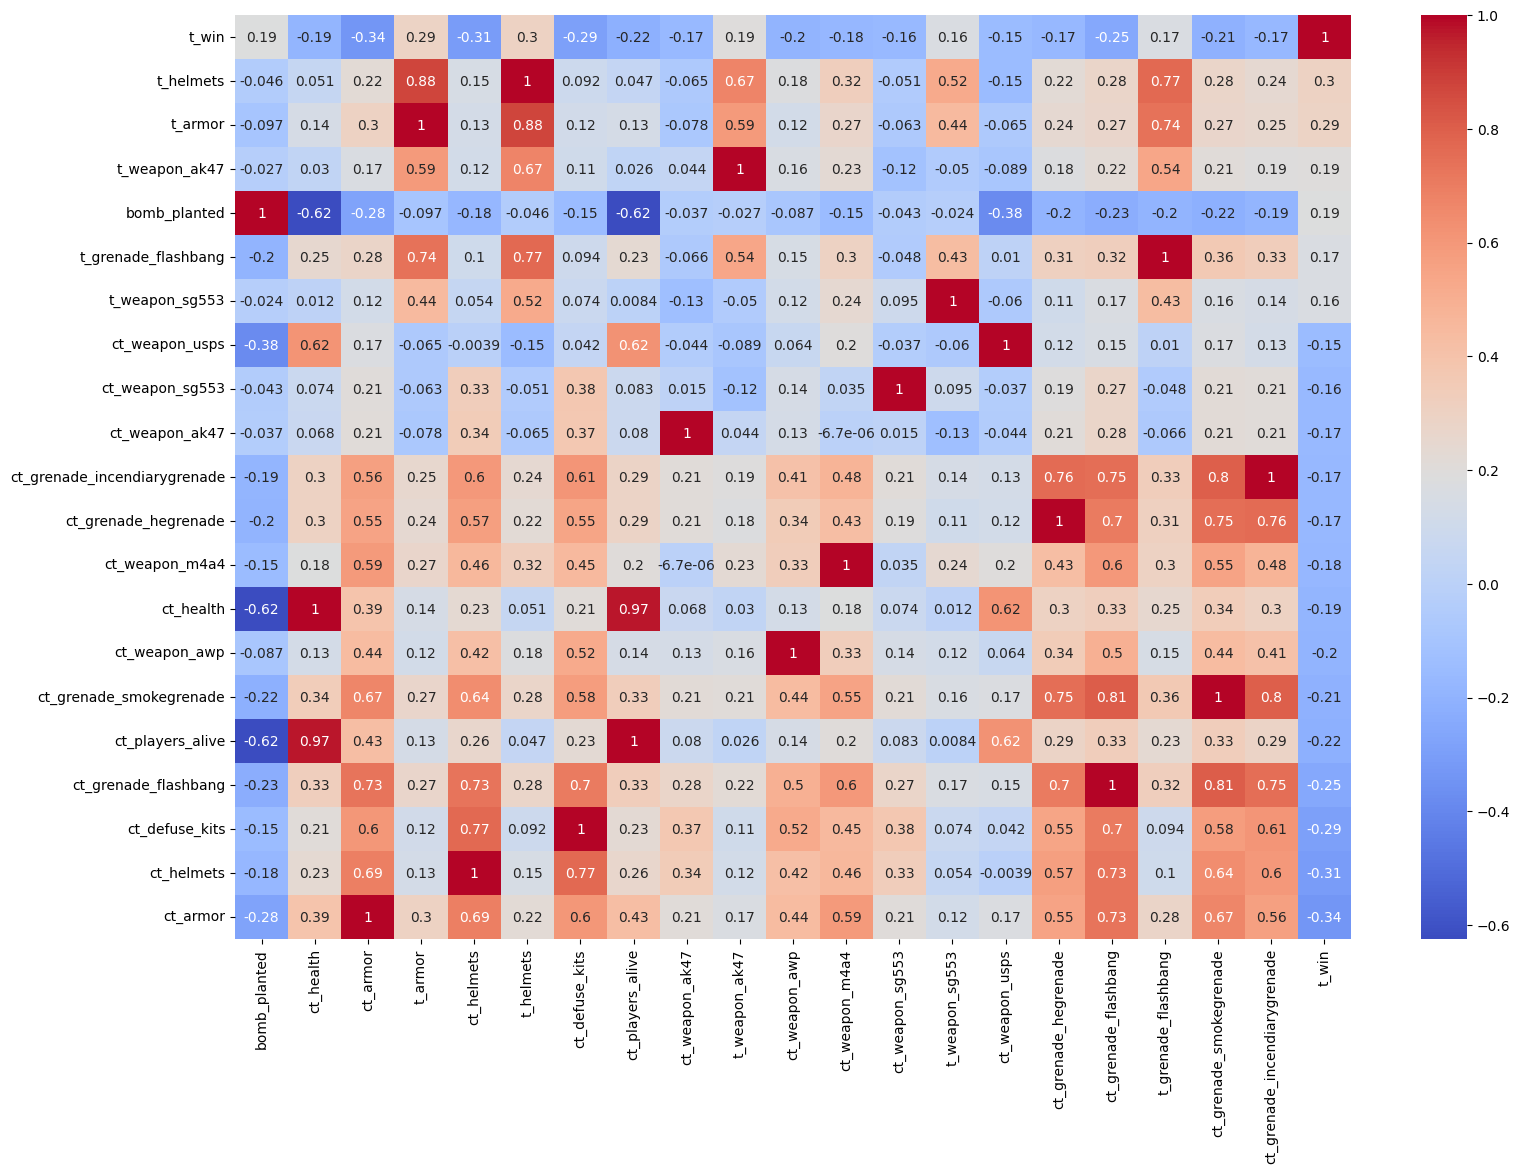

In [35]:
plt.figure(figsize=(18,12))
sns.heatmap(cs_selected.corr().sort_values("t_win", ascending=False), annot=True,cmap="coolwarm")

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>],
       [<Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Axes: title={'center': 'ct_grenade_incendiarygrenad

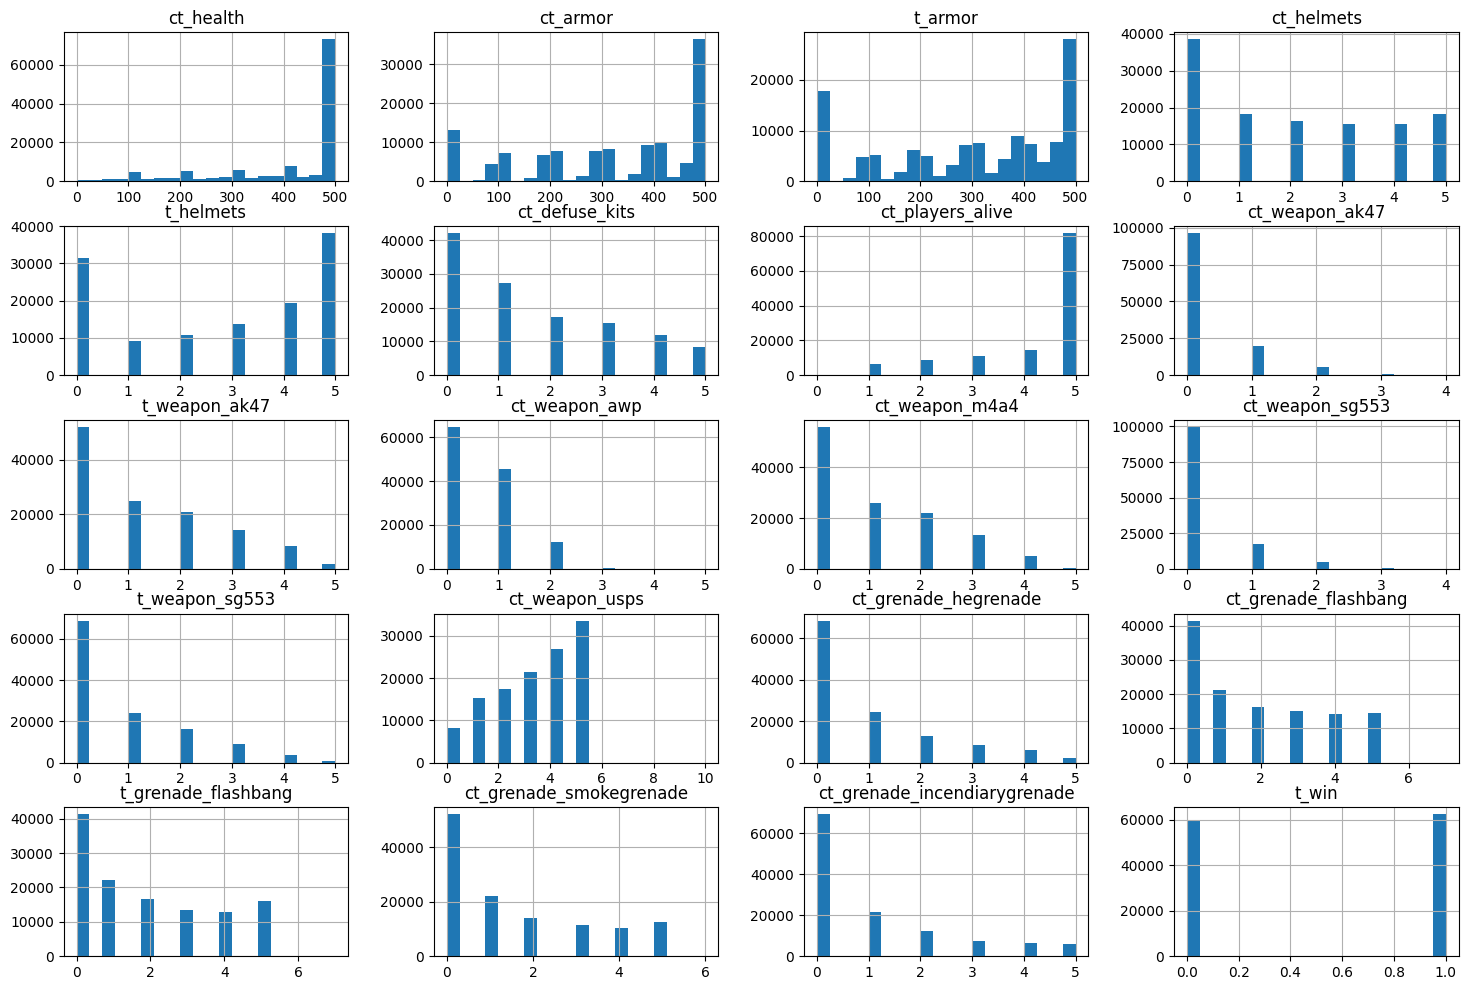

In [37]:
cs_selected.hist(figsize=(18,12), bins=20)

In [38]:
cs_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bomb_planted                  122410 non-null  bool   
 1   ct_health                     122410 non-null  float64
 2   ct_armor                      122410 non-null  float64
 3   t_armor                       122410 non-null  float64
 4   ct_helmets                    122410 non-null  float64
 5   t_helmets                     122410 non-null  float64
 6   ct_defuse_kits                122410 non-null  float64
 7   ct_players_alive              122410 non-null  float64
 8   ct_weapon_ak47                122410 non-null  float64
 9   t_weapon_ak47                 122410 non-null  float64
 10  ct_weapon_awp                 122410 non-null  float64
 11  ct_weapon_m4a4                122410 non-null  float64
 12  ct_weapon_sg553               122410 non-nul

Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [42]:
X,y=cs_selected.drop(["t_win"], axis=1), cs_selected["t_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler=StandardScaler()

In [44]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [46]:
knn.score(X_test_scaled,y_test)

0.7655420308798301

In [58]:
from sklearn.model_selection import RandomizedSearchCV

param_grid ={
    "n_neighbors": list(range(5,17,2)),
    "weights": ["uniform", "distance"],
}

knn= KNeighborsClassifier(n_jobs=4)

clf=RandomizedSearchCV(knn, param_grid, n_jobs=2,n_iter=3,verbose=2,cv=3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=4), n_iter=3,
                   n_jobs=2,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [59]:
knn= clf.best_estimator_
knn.score(X_test_scaled,y_test)

0.782166489665877

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

_grid ={
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

forrest= RandomForestClassifier(n_jobs=4)

rand=RandomizedSearchCV(forrest, _grid, n_jobs=2,n_iter=3,verbose=2,cv=3)
rand.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=4), n_iter=3,
                   n_jobs=2,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=2)

In [64]:
forr= rand.best_estimator_
forr.score(X_test_scaled,y_test)

0.8316722489992647

# Neural Network
### Sigmoid Activation

In [65]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [78]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [81]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)


model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 [==============================] - 9s 4ms/step - loss: 0.4730 - accuracy: 0.7435 - val_loss: 0.4726 - val_accuracy: 0.7492
Epoch 2/30
2602/2602 [==============================] - 7s 3ms/step - loss: 0.4725 - accuracy: 0.7435 - val_loss: 0.4723 - val_accuracy: 0.7462
Epoch 3/30
2602/2602 [==============================] - 10s 4ms/step - loss: 0.4724 - accuracy: 0.7434 - val_loss: 0.4711 - val_accuracy: 0.7453
Epoch 4/30
2602/2602 [==============================] - 7s 3ms/step - loss: 0.4720 - accuracy: 0.7431 - val_loss: 0.4685 - val_accuracy: 0.7479
Epoch 5/30
2602/2602 [==============================] - 9s 3ms/step - loss: 0.4713 - accuracy: 0.7429 - val_loss: 0.4700 - val_accuracy: 0.7499
Epoch 6/30
2602/2602 [==============================] - 8s 3ms/step - loss: 0.4716 - accuracy: 0.7441 - val_loss: 0.4678 - val_accuracy: 0.7448
Epoch 7/30
2602/2602 [==============================] - 9s 3ms/step - loss: 0.4708 - accuracy: 0.7428 - val_loss: 0.4764 - val_accuracy

In [80]:
model.evaluate(X_test_scaled, y_test)

766/766 [==============================] - 4s 5ms/step - loss: 0.6632 - accuracy: 0.6884


[0.6632415652275085, 0.6884241700172424]